In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('../data/COVID-19-Constructed-Dataset.csv')
df.shape

(8400, 18)

In [4]:
df.head(12)

,studentID,school,gradelevel,gender,covidpos,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,readingscore,writingscore,mathscore,readingscoreSL,writingscoreSL,mathscoreSL,timeperiod
0,1,0,6,1,1,59065,0,5,3,1,0,73,69,87,85,83,71,2
1,1,0,6,1,1,59065,0,5,3,1,0,63,73,57,78,75,58,4
2,1,0,6,1,1,59065,0,5,3,1,0,80,67,57,88,80,85,1
3,1,0,6,1,1,59065,0,5,3,1,0,69,56,74,70,48,87,3
4,1,0,6,1,1,59065,0,5,3,1,0,83,87,65,69,86,66,0
5,1,0,6,1,1,59065,0,5,3,1,0,62,37,63,82,78,85,5
6,2,0,6,1,1,107480,1,4,1,1,1,75,91,85,71,59,83,1
7,2,0,6,1,1,107480,1,4,1,1,1,77,82,59,71,81,56,2
8,2,0,6,1,1,107480,1,4,1,1,1,63,77,85,54,73,64,4
9,2,0,6,1,1,107480,1,4,1,1,1,84,60,77,67,55,57,5


In [5]:
df['totalscore'] = df['readingscore']+df['writingscore']+df['mathscore']
df.head(2)

,studentID,school,gradelevel,gender,covidpos,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,readingscore,writingscore,mathscore,readingscoreSL,writingscoreSL,mathscoreSL,timeperiod,totalscore
0,1,0,6,1,1,59065,0,5,3,1,0,73,69,87,85,83,71,2,229
1,1,0,6,1,1,59065,0,5,3,1,0,63,73,57,78,75,58,4,193


In [6]:
df['PreCovid']=np.where(df['timeperiod'] < 3, df['totalscore'],0)
df['PostCovid']=np.where(df['timeperiod'] > 2, df['totalscore'],0)
df.head(12)

,studentID,school,gradelevel,gender,covidpos,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,readingscore,writingscore,mathscore,readingscoreSL,writingscoreSL,mathscoreSL,timeperiod,totalscore,PreCovid,PostCovid
0,1,0,6,1,1,59065,0,5,3,1,0,73,69,87,85,83,71,2,229,229,0
1,1,0,6,1,1,59065,0,5,3,1,0,63,73,57,78,75,58,4,193,0,193
2,1,0,6,1,1,59065,0,5,3,1,0,80,67,57,88,80,85,1,204,204,0
3,1,0,6,1,1,59065,0,5,3,1,0,69,56,74,70,48,87,3,199,0,199
4,1,0,6,1,1,59065,0,5,3,1,0,83,87,65,69,86,66,0,235,235,0
5,1,0,6,1,1,59065,0,5,3,1,0,62,37,63,82,78,85,5,162,0,162
6,2,0,6,1,1,107480,1,4,1,1,1,75,91,85,71,59,83,1,251,251,0
7,2,0,6,1,1,107480,1,4,1,1,1,77,82,59,71,81,56,2,218,218,0
8,2,0,6,1,1,107480,1,4,1,1,1,63,77,85,54,73,64,4,225,0,225
9,2,0,6,1,1,107480,1,4,1,1,1,84,60,77,67,55,57,5,221,0,221


In [7]:

df=df[['studentID','school', 'gradelevel', 'gender', 'covidpos', 'householdincome', 'freelunch', 'numcomputers', 'familysize', 'fathereduc', 'mothereduc', 'PreCovid', 'PostCovid']]

In [8]:
df.head(12)

,studentID,school,gradelevel,gender,covidpos,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,PreCovid,PostCovid
0,1,0,6,1,1,59065,0,5,3,1,0,229,0
1,1,0,6,1,1,59065,0,5,3,1,0,0,193
2,1,0,6,1,1,59065,0,5,3,1,0,204,0
3,1,0,6,1,1,59065,0,5,3,1,0,0,199
4,1,0,6,1,1,59065,0,5,3,1,0,235,0
5,1,0,6,1,1,59065,0,5,3,1,0,0,162
6,2,0,6,1,1,107480,1,4,1,1,1,251,0
7,2,0,6,1,1,107480,1,4,1,1,1,218,0
8,2,0,6,1,1,107480,1,4,1,1,1,0,225
9,2,0,6,1,1,107480,1,4,1,1,1,0,221


In [104]:
df1 = df.groupby(['studentID', 'gradelevel', 'gender', 'covidpos', 'householdincome', 'freelunch', 'numcomputers', 'familysize', 'fathereduc', 'mothereduc'], as_index=False).agg({'PreCovid': np.sum, 'PostCovid':np.sum})

In [105]:
df1.head(100)

,studentID,gradelevel,gender,covidpos,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,PreCovid,PostCovid
0,1,6,1,1,59065,0,5,3,1,0,668,554
1,2,6,1,1,107480,1,4,1,1,1,734,664
2,3,6,1,0,79801,1,0,2,1,1,703,637
3,4,6,1,1,125976,1,2,3,1,2,766,688
4,5,6,0,1,110744,1,5,2,0,1,739,695
5,6,6,1,0,142042,1,5,2,1,1,729,643
6,7,6,0,0,109462,1,5,2,1,1,711,664
7,8,6,1,1,115260,1,2,2,1,1,740,673
8,9,6,0,0,144880,1,0,3,2,1,806,733
9,10,6,0,0,93307,1,4,2,1,1,795,670


In [106]:
print(df1['PostCovid'].describe())

count    1512.000000
mean      592.056878
std       180.596125
min         0.000000
25%       571.000000
50%       634.000000
75%       692.000000
max       795.000000
Name: PostCovid, dtype: float64


In [107]:
print(df1['PreCovid'].describe())

count    1512.000000
mean      657.897487
std       147.028140
min       157.000000
25%       620.750000
50%       693.500000
75%       757.000000
max       868.000000
Name: PreCovid, dtype: float64


In [190]:
print(df1['householdincome'].describe())

count      1363.000000
mean      84982.462949
std       37866.032562
min           0.000000
25%       53632.000000
50%       87430.000000
75%      116917.500000
max      179297.000000
Name: householdincome, dtype: float64


In [108]:
#print(df1.shape[0])
#cutpoint = df1['PostCovid'].mean()+ df1['PostCovid'].std()
#print(cutpoint)
#cutpoint=0
#df1=df1[df1['PostCovid']>=cutpoint].copy()
#print(df1.shape[0])

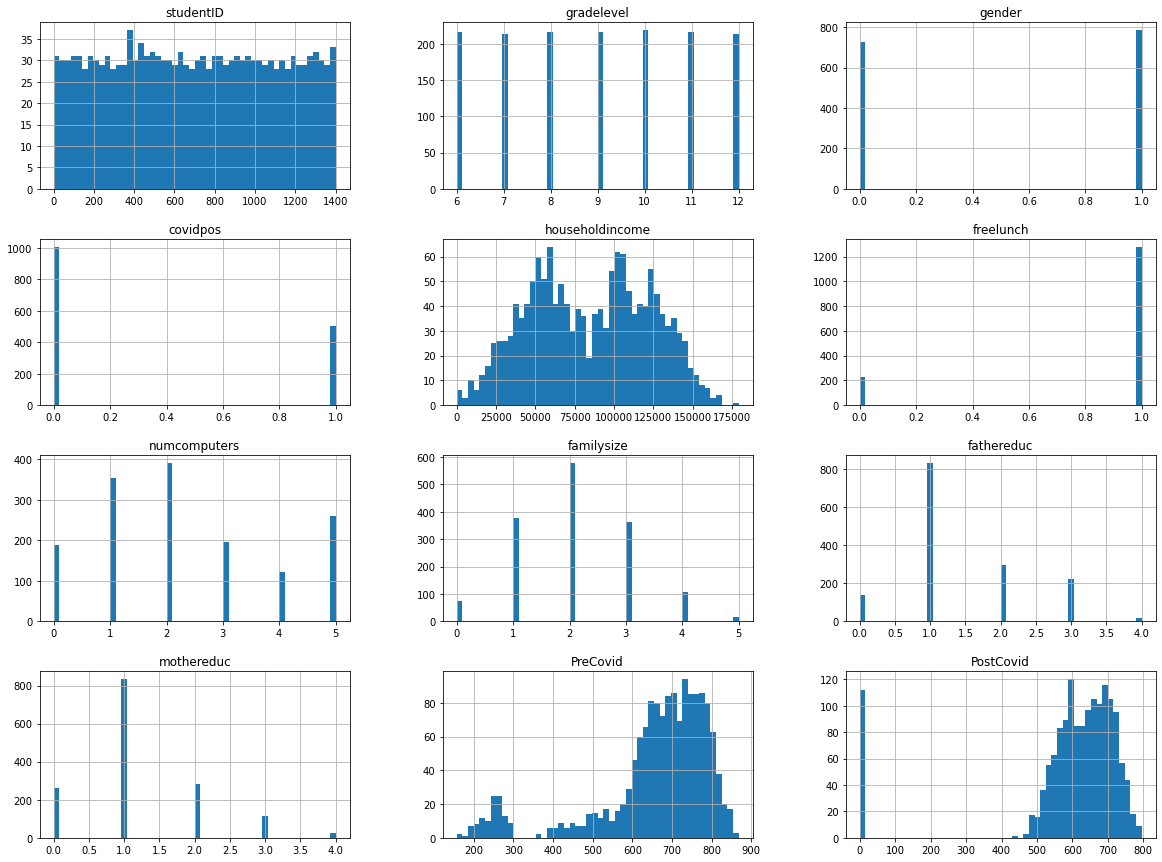

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
df1.hist(bins=50, figsize=(20,15))
plt.show()

In [110]:
corr_matrix = df1.corr()
corr_matrix["PostCovid"].sort_values(ascending=False)

PostCovid          1.000000
PreCovid           0.861408
mothereduc         0.382356
householdincome    0.248146
freelunch          0.178043
numcomputers       0.144550
gradelevel         0.002945
familysize        -0.002100
gender            -0.061423
covidpos          -0.152179
studentID         -0.226907
fathereduc        -0.400685
Name: PostCovid, dtype: float64

In [158]:
cutpoint=0
df1 = df1[(df1['PostCovid'] != 0) & (df1['PostCovid'] >= 450)]
df1.shape

(1363, 12)

In [159]:
df1 = df1[df1['PreCovid'] > 400]
df1.shape

(1363, 12)

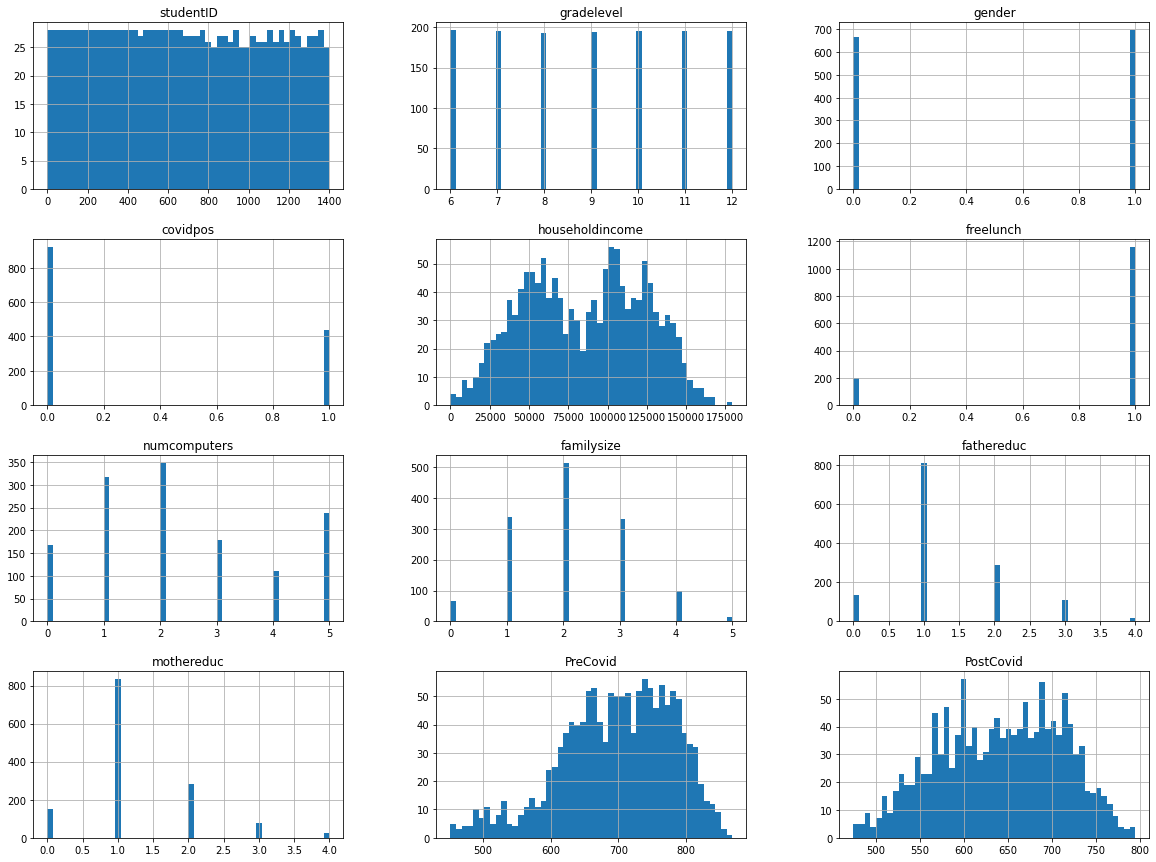

In [160]:
df1.hist(bins=50, figsize=(20,15))
plt.show()

In [161]:
df1[['studentID', 'gradelevel', 'gender', 'covidpos', 'householdincome', 'freelunch', 'numcomputers', 'familysize', 'fathereduc', 'mothereduc', 'PreCovid', 'PostCovid']].dtypes

studentID          int64
gradelevel         int64
gender             int64
covidpos           int64
householdincome    int64
freelunch          int64
numcomputers       int64
familysize         int64
fathereduc         int64
mothereduc         int64
PreCovid           int64
PostCovid          int64
dtype: object

In [162]:
df1[['studentID', 'gradelevel', 'gender', 'covidpos', 'householdincome', 'freelunch', 'numcomputers', 'familysize', 'fathereduc', 'mothereduc', 'PreCovid', 'PostCovid']].isnull().sum()

studentID          0
gradelevel         0
gender             0
covidpos           0
householdincome    0
freelunch          0
numcomputers       0
familysize         0
fathereduc         0
mothereduc         0
PreCovid           0
PostCovid          0
dtype: int64

In [163]:
# declare features and target
features = ['covidpos', 'householdincome', 'freelunch', 'numcomputers', 'fathereduc', 'mothereduc', 'PreCovid']
y = df1['PostCovid']
X = df1[features]
print(y.shape, X.shape)

(1363,) (1363, 7)


In [164]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=12)

In [165]:
# Fit the model to the training dataset
mymodel = LinearRegression()
mymodel.fit(X_train, y_train)

LinearRegression()

In [166]:
# coefficients and intercept
mymodel.intercept_


388.9461164168663

In [167]:
mymodel.coef_

array([-1.95317814e+01,  9.58849487e-04,  3.19677626e+01,  2.43207864e+00,
        1.21616872e+01,  1.08461152e+01,  1.63581219e-01])

In [168]:
# what is the equation for this model?
cols=list(X.columns)
coefs=list(mymodel.coef_)
xcoefs = [(coefs[i], cols[i]) for i in range(0, len(cols))]
equation = f'y = {round(mymodel.intercept_,4)} + {round(xcoefs[0][0],4)}*{xcoefs[0][1]} + {round(xcoefs[1][0],4)}*{xcoefs[1][1]} + {round(xcoefs[2][0],4)}*{xcoefs[2][1]} + {round(xcoefs[3][0],4)}*{xcoefs[3][1]}+ {round(xcoefs[4][0],4)}*{xcoefs[4][1]}+ {round(xcoefs[5][0],4)}*{xcoefs[5][1]} + {round(xcoefs[6][0],4)}*{xcoefs[6][1]} '
print("Regression Equation: ", equation)  

Regression Equation:  y = 388.9461 + -19.5318*covidpos + 0.001*householdincome + 31.9678*freelunch + 2.4321*numcomputers+ 12.1617*fathereduc+ 10.8461*mothereduc + 0.1636*PreCovid 


In [169]:
cols=list(X.columns)
cols

['covidpos',
 'householdincome',
 'freelunch',
 'numcomputers',
 'fathereduc',
 'mothereduc',
 'PreCovid']

In [170]:
coefs=list(mymodel.coef_)
xcoefs = [(coefs[i], cols[i]) for i in range(0, len(cols))]
xcoefs

[(-19.531781426677433, 'covidpos'),
 (0.0009588494866572051, 'householdincome'),
 (31.967762550351157, 'freelunch'),
 (2.432078636681153, 'numcomputers'),
 (12.161687248374836, 'fathereduc'),
 (10.846115208027411, 'mothereduc'),
 (0.16358121923421134, 'PreCovid')]

In [171]:
# Predict the y-values on the testing dataset & examine the first few
y_preds = [int(x) for x in mymodel.predict(X_test)]
print(list(y_test[:10]))
print(y_preds[:10])

[677, 697, 718, 644, 642, 547, 720, 682, 609, 617]
[636, 686, 714, 582, 651, 528, 663, 687, 610, 585]


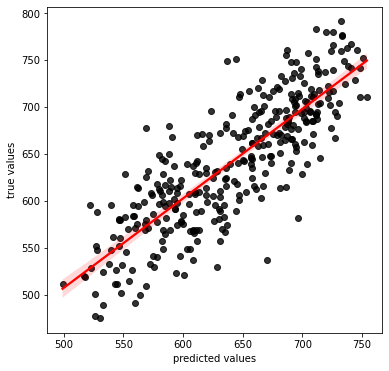

In [172]:
# compare predictions to known values
plt.figure(figsize=(6,6))
ax = sns.regplot(x = y_preds, 
                 y = y_test, 
                 scatter_kws={"color": "black"}, 
                 line_kws={"color": "red"})
ax.set(xlabel='predicted values', ylabel='true values');

In [173]:
# R-2 (coefficient of determination)
r2 = metrics.r2_score(y_test, y_preds)
round(r2, 2)

0.69

In [174]:
# root mean sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_preds))
rmse

38.18568616073283

In [175]:
# is that more or less than if we just used the average as our model?
avg_val = y_train.mean()
comparison = np.full((len(y_test), ), avg_val)
baseline=sqrt(metrics.mean_squared_error(y_test, comparison))
print(round(baseline,2))
print(round(rmse,2))
print('improvement:',round(rmse-baseline,2))

68.63
38.19
improvement: -30.45


In [176]:
print(equation)

y = 388.9461 + -19.5318*covidpos + 0.001*householdincome + 31.9678*freelunch + 2.4321*numcomputers+ 12.1617*fathereduc+ 10.8461*mothereduc + 0.1636*PreCovid 


In [207]:
fake1= [[1,60000,0,2,1,1,800]]

In [208]:
for data in [fake1]:
    covidpos=data[0][0]
    householdincome=data[0][1]
    freelunch=data[0][2]
    numcomputers=data[0][3]
    fathereduc=data[0][4]
    mothereduc=data[0][5]
    PreCovid=data[0][6]

    y = 388.9461 + -19.5318*covidpos + 0.001*householdincome + 31.9678*freelunch + 2.4321*numcomputers+ 12.1617*fathereduc+ 10.8461*mothereduc + 0.1636*PreCovid  

    print('Grade: ',int(y))

Grade:  588


In [191]:
headings = ['Index', 'Education Level']
levels = [['0', 'No HS Diploma'],['1', 'High School Diploma'],['2', 'Bachelors Degree'],['3', 'Masters Degree'],['4', 'Doctoral Degree']]

In [203]:
for i in range(2):
    print (headings[i])


Index
Education Level


In [204]:
y = 100/7

In [205]:
y

14.285714285714286

In [206]:
int(y)

14